# Preprocessing

In [31]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Option to display all the dataframe columns
pd.options.display.max_columns = None

In [3]:
# Importing dataset
df = pd.read_csv("dataset/train.csv")

# Transform dates from '%d/%m/%Y' to '%Y-%m-%d' so the lexicographic order
# is the same as the actual date order (useful for plotting)
def transform_date(x):
    date = datetime.datetime.strptime(x, '%d/%m/%Y')
    return date.strftime('%Y-%m-%d')

df['Date'] = df['Date'].map(transform_date)

## Overview

In [32]:
df.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,NearestCompetitor,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,Max_Humidity,Max_Sea_Level_PressurehPa,Max_TemperatureC,Max_VisibilityKm,Max_Wind_SpeedKm_h,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,AssortmentType_General,AssortmentType_With Fish Department,AssortmentType_With Non-Food Department,Rain,Snow,Fog,Hail,Thunderstorm,IsSaturday,IsSunday,OrdinalDate,WasOpenYesterday,IsOpenTomorrow,YesterdaySales,Previous3DaysSales,PreviousWeekSales,PreviousMonthSales
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,1.299998,8002.71122,259.325073,4057.377536,12381.265718,14050.547848,3861.519300,5.388005,8.512014,34.006349,93.523316,1018.133184,14.424012,23.560275,22.223437,6.229677,74.862845,1015.002422,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096,0.566302,0.004181,0.429516,0.594299,0.079016,0.256697,0.006457,0.063231,0.142721,0.142721,355.476486,0.835288,0.828294,3883.124624,3886.370245,3888.063946,3888.145211
std,216.395820,0.169808,0.375884,0.486189,0.897108,11537.70753,185.857102,2729.630381,9140.692427,2755.425404,2816.719484,1.812274,5.988302,12.983264,7.617389,7.985673,8.196295,9.169704,8.725281,5.881529,12.939739,8.261523,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193,0.495585,0.064529,0.495008,0.491028,0.269764,0.436811,0.080094,0.243378,0.349788,0.349788,209.667287,0.370921,0.377125,2795.850190,2083.548506,1808.552332,1693.809614
min,1000.000000,0.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,344.000000,9893.000000,816.000000,0.000000,-14.000000,4.590606,44.000000,976.000000,-11.000000,0.000000,3.000000,-15.000000,30.000000,974.000000,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1187.000000,0.000000,1.000000,0.000000,0.000000,1057.00000,166.000000,2573.000000,7215.000000,11849.000000,1293.000000,4.000000,4.000000,24.483234,90.000000,1013.000000,8.000000,11.000000,14.000000,2.000000,66.000000,1010.000000,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000,1.000000,1.000000,2231.000000,2581.666667,2832.285714,2934.166667
50%,1373.000000,0.000000,1.000000,0.000000,2.000000,3321.00000,251.000000,4020.000000,9643.000000,15017.000000,2770.000000,6.000000,9.000000,32.134244,94.000000,1018.000000,15.000000,31.000000,21.000000,7.000000,76.000000,1015.000000,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,1.000000,1.000000,3906.000000,3610.000000,3692.857143,3742.233333
75%,1561.000000,0.000000,1.000000,1.000000,2.000000,9673.00000,345.000

The dimension of the dataframe

In [5]:
n_instances, n_features = df.shape

So, there are **36** features and **523021** instances

### Given features

The features we are initially given are: 


 * **StoreID** : Store ID,
 * **Date** : Observation Date,
 * **IsHoliday** : Regional Holiday,
 * **IsOpen** : Store Open,
 * **HasPromotions** : The Store is currently running promotions,
 * **StoreType** : Type of Store (Standard Market, Super Market, Hyper Market, Shopping Centre),
 * **AssortmentType** : Type of Products (General, With Fish Department, With Non-Food Department),
 * **NearestCompetitor** : Distance (meters) to the nearest competitor store,
 * **Region** : Region ID ,
 * **NumberOfCustomers** : Number of Customer,
 * **NumberOfSales** :Number of Products Sold **(Target Value)**,
 * **Region_AreaKM2** : Region Size in which the Store is located (Km<sup>2</sup>),
 * **Region_GDP** : Region Gross Domestic Product,
 * **Region_PopulationK** : Region Population Size (k),
 * **CloudCover** : Level of Covering(0-9),
 * **Events** : Meteorological event,
 * **Max_Dew_PointC** : Max Dew Point (Celsius),
 * **Max_Gust_SpeedKm_h** : Max Gust Speed (Km/h),
 * **Max_Humidity** : Max Humidity, 
 * **Max_Sea_Level_PressurehPa** : Max Pressure (hPa),
 * **Max_TemperatureC** : Max Temperature (Celsius),
 * **Max_VisibilityKm** : Max Visibility (Km),
 * **Max_Wind_SpeedKm_h** : Max Wind Speed (Km/h),
 * **Mean_Dew_PointC** : Mean Dew Point (Celsius),
 * **Mean_Humidity** : Mean Humidity,
 * **Mean_Sea_Level_PressurehPa** : Mean Pressure (hPa),
 * **Mean_TemperatureC** : Mean Temperature (Celsius),
 * **Mean_VisibilityKm** : Mean Visibility (Km),
 * **Mean_Wind_SpeedKm_h** : Mean Window Speed (Km/h),
 * **Min_Dew_PointC** : Min Dew Point (Celsius),
 * **Min_Humidity** : Min Humidity,
 * **Min_Sea_Level_PressurehPa** : Min Pressure (hPa),
 * **Min_TemperatureC** : Min Temperature (Celsius),
 * **Min_VisibilitykM** : Min Visibility (Km),
 * **Precipitationmm** : Precipitation Amount (mm),
 * **WindDirDegrees** : Window Direction (degrees).
 
 

In [34]:
categorical_variables_mask = df.dtypes==object
categorical_variables = df.columns[categorical_variables_mask]
numerical_variables = df.columns[~categorical_variables_mask]
print('{} Numerical Variables: '.format(len(numerical_variables)), numerical_variables)
print('{} Categorical Variables: '.format(len(categorical_variables)), categorical_variables)

49 Numerical Variables:  Index(['StoreID', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'NearestCompetitor', 'NumberOfCustomers', 'NumberOfSales',
       'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover',
       'Max_Dew_PointC', 'Max_Gust_SpeedKm_h', 'Max_Humidity',
       'Max_Sea_Level_PressurehPa', 'Max_TemperatureC', 'Max_VisibilityKm',
       'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC', 'Mean_Humidity',
       'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm',
       'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC', 'Min_Humidity',
       'Min_Sea_Level_PressurehPa', 'Min_TemperatureC', 'Min_VisibilitykM',
       'Precipitationmm', 'WindDirDegrees', 'AssortmentType_General',
       'AssortmentType_With Fish Department',
       'AssortmentType_With Non-Food Department', 'Rain', 'Snow', 'Fog',
       'Hail', 'Thunderstorm', 'IsSaturday', 'IsSunday', 'OrdinalDate',
       'WasOpenYesterday', 'IsOpenTomorrow', 'YesterdaySales',
       'Previous

We can see that there are 4 categorical variables:

* StoreType, with 4 levels (Standard Market, Super Market, Hyper Market, Shopping Centre)
* AssortmentType, with 3 levels (General, With Fish Department, With Non-Food Department)
* Events, with 22 levels (NaN, and combinations of 5 atmospherical events: Rain, Fog, Hail, Snow, Thunderstorm)
* Date, with 729 levels (every day from March 1, 2016 to February 28, 2018)

So we have to find ways to convert these categorical variables to numerical.

### Missing values

The numbers of null values for each columns is:

In [7]:
#Only features with missing values, the others are omitted
missing_values = round(df.isnull().sum() / n_instances * 100, 3)
features_with_missings = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
features_with_missings

Max_Gust_SpeedKm_h    78.381
Events                23.727
CloudCover             7.874
Min_VisibilitykM       2.168
Mean_VisibilityKm      2.168
Max_VisibilityKm       2.168
dtype: float64

## Data exploration

First of all, we analyse the distribution of the target value, **NumberOfSales**


mu = 4057.38 and sigma = 2729.63

Skewness: 0.655949
Kurtosis: 1.756632


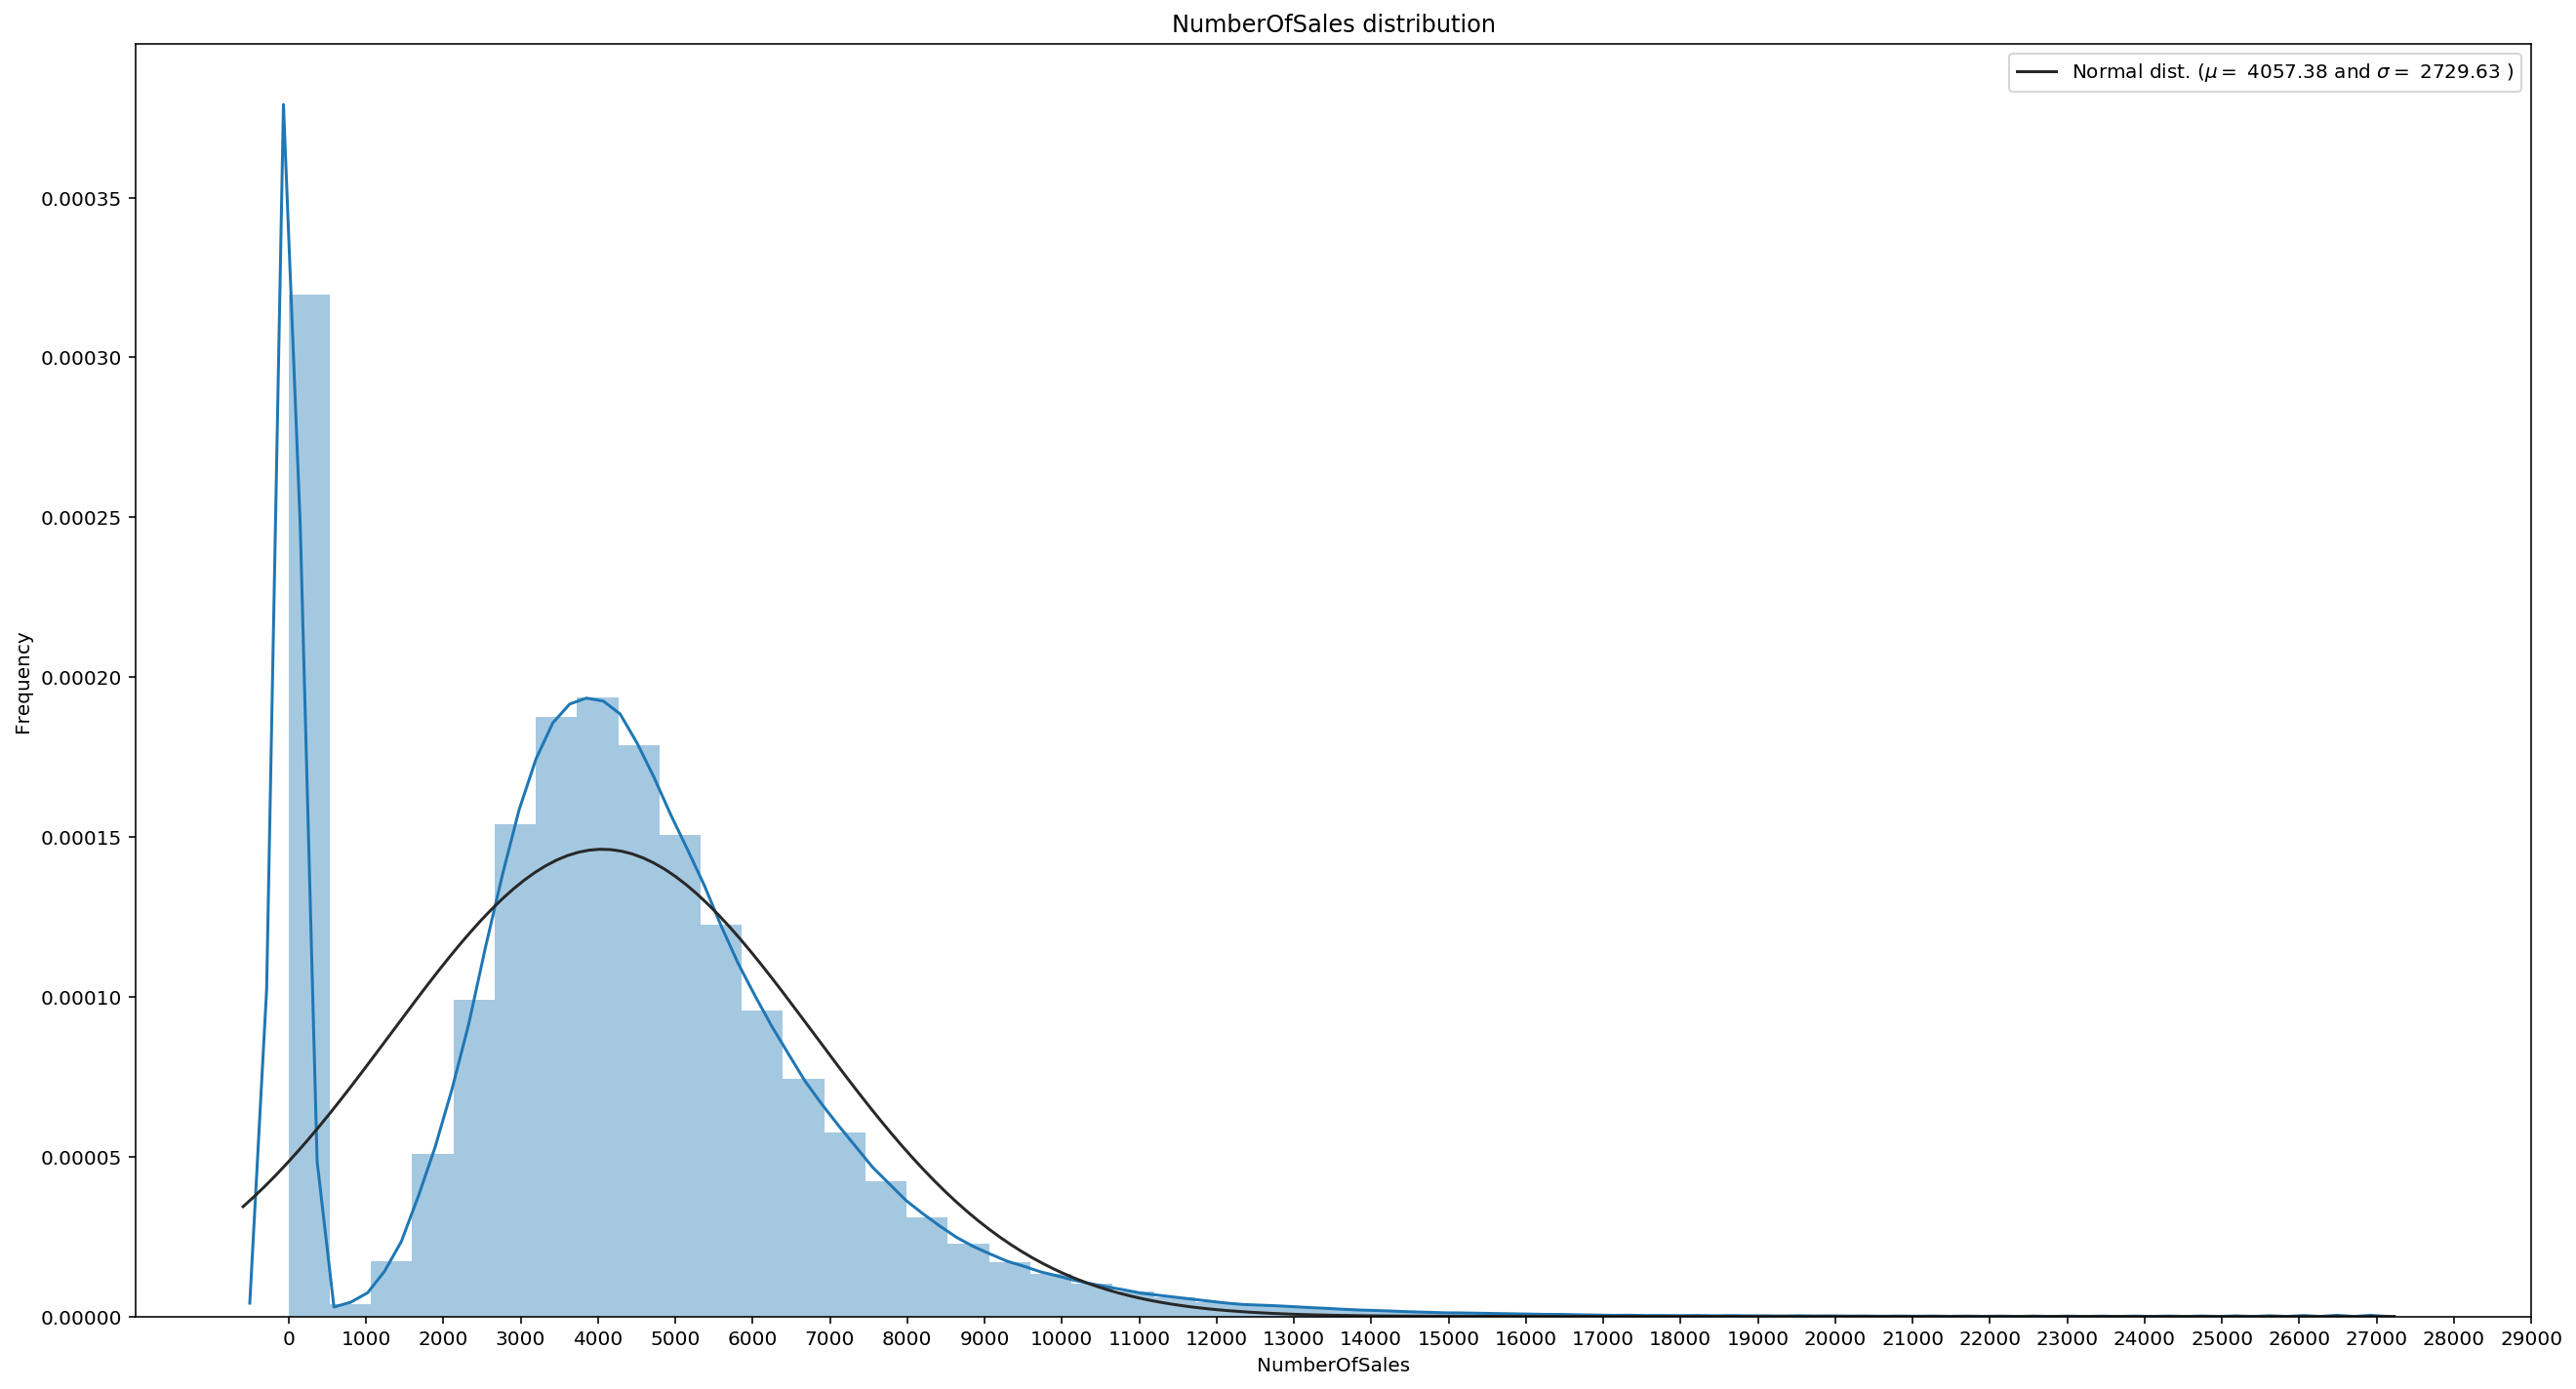

In [8]:
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0)
# Try and fit the data with a normal distribution
sns.distplot(df['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(df['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % df['NumberOfSales'].skew())
print("Kurtosis: %f" % df['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 30000, step=1000))

There is an high frequency of **low** number of sales. We should understand the reasons behind this.

Now we split the dataset in two parts: instances with a low number of sales (less than 500) and instances with a high number of sales (more than 500):

In [9]:
# Split the dataset for separate analysis
low_numberofsales = df.loc[df['NumberOfSales'] < 500]
high_numberofsales = df.loc[df['NumberOfSales'] >= 500]

In [10]:
low_numberofsales.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,...,89116.000000,87036.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,87036.000000,89116.000000,89116.000000
mean,1374.072052,0.169812,0.000595,0.060786,7806.503423,5.643442,0.008629,0.099084,12711.060999,14074.026965,...,9.968625,12.173859,11.984930,3.438316,51.501391,1012.200559,5.994793,7.084344,0.843646,179.493716
std,217.130480,0.375470,0.024380,0.238939,11026.952750,3.357265,0.576294,6.614012,9260.031519,2730.985161,...,6.998007,4.861304,5.733488,6.079839,18.995532,8.597819,6.311125,4.772251,2.556647,103.757893
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-12.000000,0.000000,3.000000,-18.000000,11.000000,977.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,0.000000,0.000000,1043.000000,2.000000,0.000000,0.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,85.000000
50%,1375.000000,0.000000,0.000000,0.000000,3351.000000,6.000000,0.000000,0.000000,9643.000000,15017.000000,...,10.000000,11.000000,11.000000,4.000000,52.000000,1013.000000,6.000000,8.000000,0.000000,207.000000
75%,1562.000000,0.000000,0.000000,0.000000,9586.000000,9.000000,0.000000,0.000000,15566.000000,15931.000000,...,15.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,261.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,44.000000,495.000000,32221.000000,23931.000000,...,30.000000,31.000000,40.000000,17.000000,100.000000,1035.000000,24.000000,31.000000,58.930000,360.000000


As we can see, the mean of NumberOfSales between the instances with less than 500 sales is less than 0.1. This probably means that in almost every one of these instances the store is **closed**:

In [40]:
print('Total number of instances with less than 500 sales: {}'.format(low_numberofsales.shape[0]))
print('Number of instances with less than 500 sales in which the store is open: {}'.format(low_numberofsales['IsOpen'].sum()))

Total number of instances with less than 500 sales: 89116
Number of instances with less than 500 sales in which the store is open: 53


This confirms our assumption. So it makes sense to analyze the complementary portion of the dataset, that with a high number of sales (> 500) to understand its distribution.


mu = 4890.67 and sigma = 2214.92

Skewness: 1.560391
Kurtosis: 4.695395


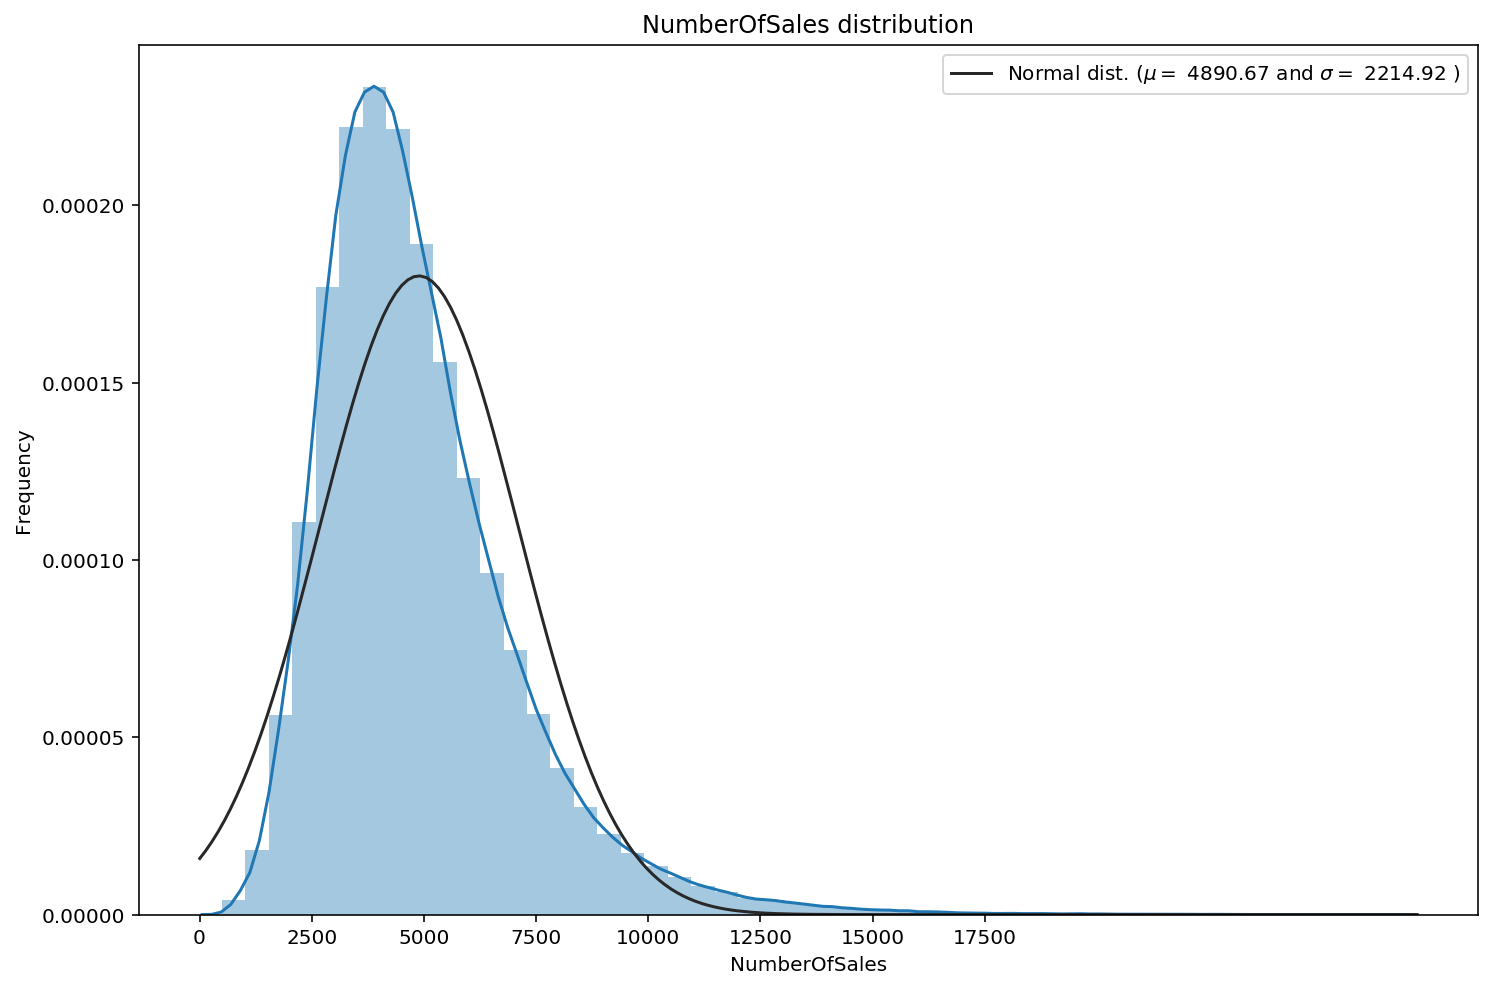

In [12]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# Try and fit the data with a normal distribution
sns.distplot(high_numberofsales['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(high_numberofsales['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % high_numberofsales['NumberOfSales'].skew())
print("Kurtosis: %f" % high_numberofsales['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 20000, step=2500))

We can normalize the data.

/home/irons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



 mu = 8.40 and sigma = 0.43

Skewness: -0.127125
Kurtosis: 0.524235


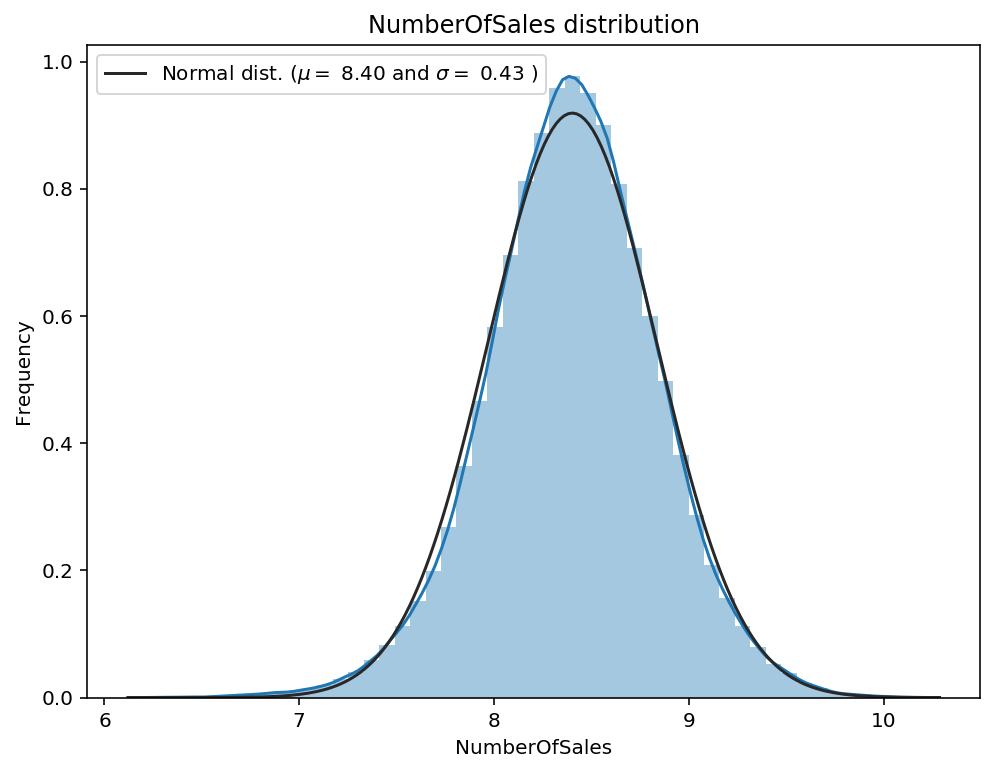

In [13]:
# We use the numpy fuction log1p which applies log(1+x) to all elements of the column
high_numberofsales["NumberOfSales"] = np.log1p(high_numberofsales["NumberOfSales"])
(mu, sigma) = norm.fit(high_numberofsales["NumberOfSales"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % high_numberofsales["NumberOfSales"].skew())
print("Kurtosis: %f" % high_numberofsales["NumberOfSales"].kurt())

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(high_numberofsales["NumberOfSales"] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
_ = plt.title('NumberOfSales distribution')

We can see that this part of the data fits a normal distribution pretty well.

## Data cleaning and feature engineering

After the initial data exploration, we'll clean the dataset and try to engineer some new interesting features.

First of all, we _drop_ the **Region ID**. It makes no sense as a numerical variable because we don't want it to act as an ordering between the different regions, and there are already 3 features which describe the most interesting things about a region:

* Region_AreaKM2
* Region_GDP
* Region_PopulationK

In [14]:
df = df.drop(labels='Region', axis=1)

Next, we convert **StoreType** to a numerical variable by assigning a fixed map of values. We believe this makes sense because there is an order between the 4 levels of the original categorical variable: e.g. 'Hyper Market' is _bigger_ than 'Super Market. So, in a sense, this feature would be an indicator of how _big_ the store is.

In [ ]:
df["StoreType"] = df["StoreType"].map({'Standard Market': 0, 'Super Market': 1, 'Hyper Market': 2, 'Shopping Center': 3})

For **AssortmentType**, we use the pandas function get_dummies, which converts the categorical variable into dummy/indicator variables. In this case, it doesn't make sense to use a single numerical feature with arbitrary numbers because the type of products a store has is better modeled as a boolean yes/no feature (e.g. has / hasn't got fish) rather than with a single ordered variable.

In [ ]:
df = pd.get_dummies(df, columns=['AssortmentType'])

We can also drop the generated 'AssortmentType_General' feature because it is a combination of the other two ('AssortmentType_With Non-Food Department' and 'AssortmentType_With Fish Department')

In [104]:
df = df.drop(labels=['AssortmentType_General'], axis=1)

The **Events** feature has many levels (21, not including NaN) and also many missing values (nearly 24%).

We believe it can safely be assumed that a NaN in this feature simply means that none of the events (Rain, Fog, Hail, Snow, Thunderstorm) occurred. This is because when Events is NaN the other features suggest a better weather (e.g. higher temperature and visibility) than when Events is not NaN.

We convert this feature in 5 boolean features that are active when the corresponding atmospherical event happened:

In [15]:
for e in ['Rain', 'Snow', 'Fog', 'Hail', 'Thunderstorm']:
    df[e] = df.loc[:, 'Events'].astype('str').apply(lambda x: int(e in x))
    
df = df.drop(labels='Events', axis=1)

We add a couple of features signaling if it is a Saturday or a Sunday:

In [16]:
def is_saturday(day):
    return int(datetime.datetime.strptime(day, '%d/%m/%Y').weekday() == 5)

def is_sunday(day):
    return int(datetime.datetime.strptime(day, '%d/%m/%Y').weekday() == 6)

df['IsSaturday'] = df['Date'].map(is_saturday)
df['IsSunday'] = df['Date'].map(is_sunday)

Now we have to **deal with the missing values**.

The approach that we are going to use is:

* see which feature has the highest correlation with the feature we want to fix;
* use that feature as a guide to fill in the missing values.

We are now going to define a handy function to do so:

In [95]:
def fill_missing(df, feature, predictor):
    feature_not_null        = df.dropna(subset=[feature])
    
    feature_mean            = feature_not_null[feature].mean()
    predictor_mean          = feature_not_null[predictor].mean()
    feature_predictor_ratio = feature_mean / predictor_mean
    
    inverse_correlation = df.corr().loc[[feature], [predictor]].iloc[0, 0] < 0
    
    def f(x):
        current_feature_value   = x[feature]
        current_predictor_value = x[predictor]
        
        new_feature_value = 0.0
        
        if np.isnan(current_feature_value):
            if inverse_correlation:
                new_feature_value = feature_mean - ((current_predictor_value - predictor_mean) * feature_predictor_ratio)
            else:
                new_feature_value = feature_mean + ((current_predictor_value - predictor_mean) * feature_predictor_ratio)
        else:
            new_feature_value = current_feature_value
            
        return new_feature_value
    
    df[feature] = df.loc[:, [feature, predictor]].apply(f, axis=1)
    
    return df

This function also deals with _inverse correlation_, that is when a variable increases then the other one decreases.

The feature with the most NaNs is **Max_Gust_SpeedKm_h** with little more than 78%. Obviously we can't drop 78% of the instances, but we don't want to drop the feature either.

We notice that, not surprisingly, this feature is very highly correlated to **Max_Wind_SpeedKm_h** (0.879945):

In [53]:
df.corr().loc[['Max_Gust_SpeedKm_h'], ['Max_Wind_SpeedKm_h']]

,Max_Wind_SpeedKm_h
Max_Gust_SpeedKm_h,0.879945


So we use that feature as a guide to fill in the missing values of Max_Gust_SpeedKm_h:

In [17]:
df = fill_missing(df, 'Max_Gust_SpeedKm_h', 'Max_Wind_SpeedKm_h')

The same can be said for **CloudCover**. The most correlated feature is Min_Humidity:

In [55]:
df.corr().loc[['CloudCover'], ['Min_Humidity']]

,Min_Humidity
CloudCover,0.419168


So we use that feature as a guide to fill in the missing values of CloudCover:

In [18]:
df = fill_missing(df, 'CloudCover', 'Min_Humidity')

Now we want to add features specifying the number of sales for the previous day, and the _mean_ number of sales for the previous 3 days, week, and month. Obviously this data is related to a single store, so first of all we have to split the dataset in chunks, based on the _StoreID_.

We also add a couple of boolean features signaling if the store was open the previous day, and if the store will be open the following day.

In [19]:
def ordinal_date(d):
    date = d['Date']
    formatted_date = datetime.datetime.strptime(date, '%d/%m/%Y')
    date = datetime.date(formatted_date.year, formatted_date.month, formatted_date.day)
    return datetime.date.toordinal(date)

df['OrdinalDate'] = df.loc[:, ['Date']].apply(ordinal_date, axis=1)

base_date = min(df['OrdinalDate'])

df['OrdinalDate'] = df['OrdinalDate'].apply(lambda x: x - base_date)

In [20]:
# Divide dataset in chunks based on the Store ID
stores = []
for store in df['StoreID'].unique():
    stores.append( df.loc[(df['StoreID'] == store)] )

In [21]:
def was_open_yesterday(x):
    date = x['OrdinalDate']
    store_index = x['StoreID'] - 1000
    if date < 30:
        return 1
    that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] == date - 1)]
    if len(that_date) < 1:
        return 0
    else:
        return that_date['IsOpen'].item()
    
df['WasOpenYesterday'] = df.loc[:, ['OrdinalDate', 'StoreID']].apply(was_open_yesterday, axis=1)

In [22]:
def is_open_tomorrow(x):
    date = x['OrdinalDate']
    store_index = x['StoreID'] - 1000
    if date == 729:
        return 1
    that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] == date + 1)]
    if len(that_date) < 1:
        return 0
    else:
        return that_date['IsOpen'].item()

df['IsOpenTomorrow'] = df.loc[:, ['OrdinalDate', 'StoreID']].apply(is_open_tomorrow, axis=1)

In [23]:
df.corr().loc[['NumberOfSales'], ['WasOpenYesterday', 'IsOpenTomorrow']]

,WasOpenYesterday,IsOpenTomorrow
NumberOfSales,-0.20478,0.021366


In [24]:
def find_ysales(x):
    date, sales, store_index = x['OrdinalDate'], x['NumberOfSales'], x['StoreID']-1000
    if date < 30:
        return 0
    else:
        that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] == date - 1)]
        if len(that_date) < 1:
            return 0
        else:
            return that_date['NumberOfSales'].item()

df['YesterdaySales'] = df.loc[:, ['OrdinalDate', 'NumberOfSales', 'StoreID']].apply(find_ysales, axis=1)

In [25]:
def find_3days_sales(x):
    date, sales, store_index = x['OrdinalDate'], x['NumberOfSales'], x['StoreID']-1000
    if date < 30:
        return 0
    else:
        that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] <= date - 1) & (stores[store_index]['OrdinalDate'] > date - 4)]
        if len(that_date) < 1:
            return 0
        else:
            return that_date['NumberOfSales'].mean()

df['Previous3DaysSales'] = df.loc[:, ['OrdinalDate', 'NumberOfSales', 'StoreID']].apply(find_3days_sales, axis=1)

In [28]:
def find_7days_sales(x):
    date, sales, store_index = x['OrdinalDate'], x['NumberOfSales'], x['StoreID']-1000
    if date < 30:
        return 0
    else:
        that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] <= date - 1) & (stores[store_index]['OrdinalDate'] > date - 8)]
        if len(that_date) < 1:
            return 0
        else:
            return that_date['NumberOfSales'].mean()

df['PreviousWeekSales'] = df.loc[:, ['OrdinalDate', 'NumberOfSales', 'StoreID']].apply(find_7days_sales, axis=1)

In [30]:
def find_30days_sales(x):
    date, sales, store_index = x['OrdinalDate'], x['NumberOfSales'], x['StoreID']-1000
    if date < 30:
        return 0
    else:
        that_date = stores[store_index].loc[(stores[store_index]['OrdinalDate'] <= date - 1) & (stores[store_index]['OrdinalDate'] > date - 31)]
        if len(that_date) < 1:
            return 0
        else:
            return that_date['NumberOfSales'].mean()
        
df['PreviousMonthSales'] = df.loc[:, ['OrdinalDate', 'NumberOfSales', 'StoreID']].apply(find_30days_sales, axis=1)

The 3 visibility features are the only ones left with a few missing values. Let's take care of them in the same way we did before.

First, we find the features which are most correlated to them:

In [86]:
df.corr().loc[['Min_VisibilitykM', 'Mean_VisibilityKm', 'Max_VisibilityKm'], ['Mean_Humidity', 'Region_AreaKM2']]

,Mean_Humidity,Region_AreaKM2
Min_VisibilitykM,-0.620345,-0.047109
Mean_VisibilityKm,-0.603040,-0.220113
Max_VisibilityKm,-0.259888,-0.443495


And then we use them for filling in the missing values:

In [98]:
df = fill_missing(df, 'Min_VisibilitykM', 'Mean_Humidity')
df = fill_missing(df, 'Mean_VisibilityKm', 'Mean_Humidity')
df = fill_missing(df, 'Max_VisibilityKm', 'Region_AreaKM2')

In [103]:
df.corr().loc[['Min_VisibilitykM', 'Mean_VisibilityKm', 'Max_VisibilityKm'], ['Mean_Humidity', 'Region_AreaKM2']]

,Mean_Humidity,Region_AreaKM2
Min_VisibilitykM,-0.615748,-0.045687
Mean_VisibilityKm,-0.606757,-0.214194
Max_VisibilityKm,-0.233406,-0.474210


Now we can drop the OrdinalDate column that we used to compute all the features related to the past sales:

In [107]:
df = df.drop(labels=['OrdinalDate'], axis=1)

And we can also drop the first month of data, because we don't have values for the features related to the past sales:

In [169]:
df.shape[0]

523021

In [170]:
df = df.drop(df[df.Date < '2016-03-31'].index)

In [171]:
df.shape[0]

501300

We have dropped a total of $num\_days * num\_stores = 29 * 749 = 21721$ rows, because there is a day which is missing from all the stores (2016-03-03).

The preprocessing is now finished. The only variable which is still categorical is 'Date', it needs to be either dropped or converted to some numerical variable(s). Here are some final statistics. As we can see, there are no more missing values.

In [173]:
n_instances, n_features = df.shape

print('Number of instances: {}\nNumber of features: {}'.format(n_instances, n_features))

#Only features with missing values, the others are omitted
missing_values = round(df.isnull().sum() / n_instances * 100, 3)
features_with_missings = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
print(features_with_missings)

df.describe()

Number of instances: 501300
Number of features: 48
Series([], dtype: float64)


,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,NearestCompetitor,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,Max_Humidity,Max_Sea_Level_PressurehPa,Max_TemperatureC,Max_VisibilityKm,Max_Wind_SpeedKm_h,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,AssortmentType_With Fish Department,AssortmentType_With Non-Food Department,Rain,Snow,Fog,Hail,Thunderstorm,IsSaturday,IsSunday,WasOpenYesterday,IsOpenTomorrow,YesterdaySales,Previous3DaysSales,PreviousWeekSales,PreviousMonthSales
count,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.00000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000,501300.000000
mean,1373.951917,0.031005,0.828404,0.380477,1.300443,8004.648354,258.882158,4049.764582,12345.055057,14046.650309,3858.114502,5.379309,8.922238,33.942602,93.653383,1018.286818,14.850391,23.530594,22.171638,6.640752,74.950714,1015.146405,10.676886,12.217599,11.643425,4.146609,51.406531,1012.20165,6.583702,7.259184,0.826458,172.062099,0.004189,0.429731,0.605895,0.064403,0.260279,0.006399,0.065721,0.142928,0.142928,0.828151,0.828412,4051.377866,4054.764117,4056.531206,4056.615991
std,216.403543,0.173332,0.377029,0.485505,0.896933,11542.355582,185.977869,2731.993598,9109.612427,2756.426826,2818.160173,1.806914,5.702747,12.992574,7.323767,7.890923,8.036137,9.599262,8.718369,5.585123,12.824675,8.173432,6.859668,4.854313,5.735674,5.610321,19.252980,8.62979,6.111813,4.744770,2.672619,101.182746,0.064588,0.495038,0.488658,0.245469,0.438787,0.079740,0.247794,0.350000,0.350000,0.377250,0.377022,2733.828088,1961.243533,1652.026649,1519.828980
min,1000.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,344.000000,9893.000000,816.000000,0.000000,-14.000000,4.590606,44.000000,976.000000,-11.000000,-14.588085,3.000000,-15.000000,30.000000,974.000000,-13.000000,0.000000,2.000000,-17.000000,10.000000,970.00000,-15.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1187.000000,0.000000,1.000000,0.000000,0.000000,1057.000000,165.000000,2562.000000,7215.000000,11849.000000,1293.000000,4.000000,4.000000,24.483234,90.000000,1013.000000,8.000000,11.000000,14.000000,2.000000,66.000000,1010.000000,6.000000,10.000000,8.000000,0.000000,36.000000,1007.00000,2.000000,4.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2561.750000,2713.333333,2944.714286,3033.600000
50%,1373.000000,0.000000,1.000000,0.000000,2.000000,3321.000000,251.000000,4014.000000,9643.000000,15017.000000,2770.000000,6.000000,9.000000,32.134244,94.000000,1019.000000,15.000000,31.000000,21.000000,7.000000,76.000000,1015.000000,11.000000,11.000000,11.000000,4.000000,51.000000,1013.00000,7.000000,8.000000,0.000000,194.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4016.000000,3699.666667,3767.714286,3814.500000
75%,1561.000000,0.000000,1.000000,1.000000,2.000000,9673.000000,345.000000,5532.000000,15566.000000,15931.000000,5727.000000,7.000000,13.000000,40.000000,100.000000,1023.000000,21.000000,31.000000,26.000000,11.000000,85.000000,102

In [174]:
df.to_csv('train_processed.csv')